# Uploading a Snapshot of the Data to Zenodo

Get API Keys from https://zenodo.org/account/settings/applications/ and https://sandbox.zenodo.org/account/settings/applications/

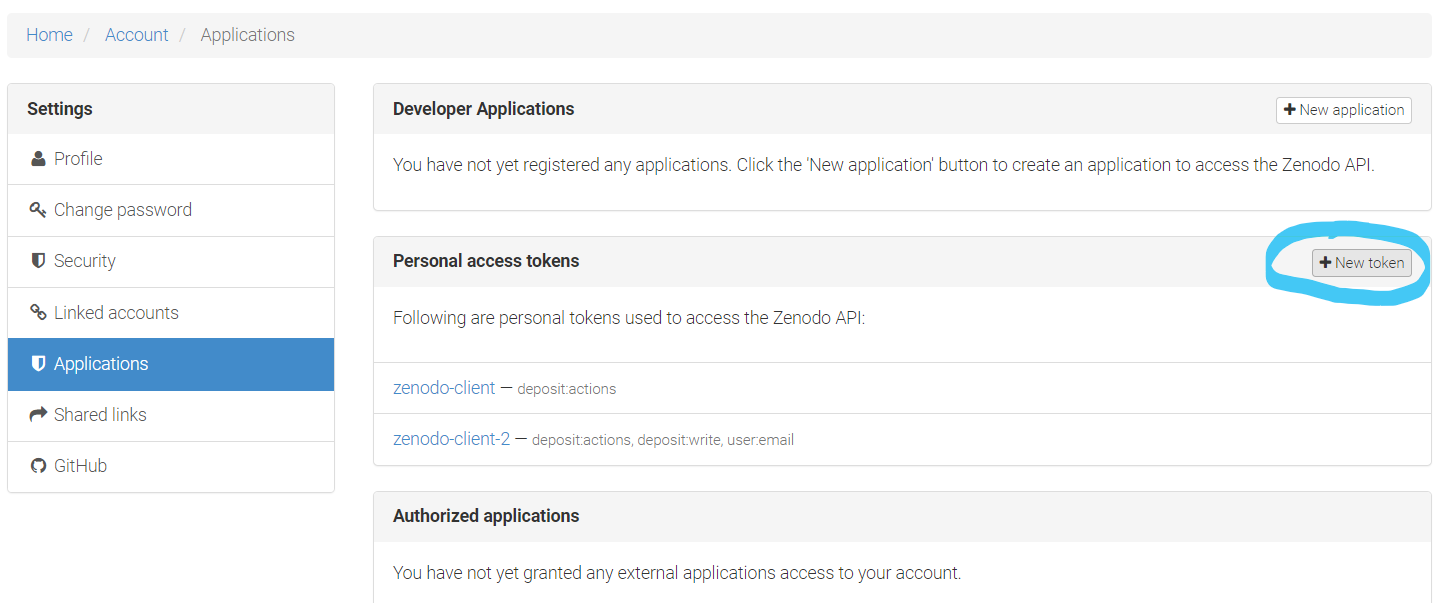

Create a file in the same directory as this notebook named `my_secrets.py` and modify
the following lines with the API keys you just created:

```python
ZENODO_API_KEY = "abc123"
ZENODO_SANDBOX_API_KEY = "abc123"
```

The following will create an empty configuration file named `zenodo.ini` for `pystow`
unless it already exists, in which case the contents won't be modified. https://github.com/cthoyt/pystow/issues/57

In [1]:
# !touch $HOME/.config/zenodo.ini

'touch' is not recognized as an internal or external command,
operable program or batch file.


At first, keep `sandbox` set to True so you can verify everything looks OK before uploading to
the normal, non-sandbox Zenodo. Once you're confident in how the submission looks, set `sandbox` to False and rerun.

In [3]:
sandbox = False

In [4]:
from zenodo_client import Creator, Metadata, ensure_zenodo
from my_secrets import ZENODO_API_KEY, ZENODO_SANDBOX_API_KEY

task_name = "crabnet-hyperparameter"
task_name_underscore = task_name.replace("-", "_")

# Define the metadata that will be used on initial upload
data = Metadata(
    title="Materials Science Optimization Benchmark Dataset for High-dimensional, Multi-objective, Multi-fidelity Optimization of CrabNet Hyperparameters",
    upload_type="dataset",
    description="Benchmarks are an essential driver of progress in scientific disciplines. Ideal benchmarks mimic real-world tasks as closely as possible, where insufficient difficulty or applicability can stunt growth in the field. Benchmarks should also have sufficiently low computational overhead to promote accessibility and repeatability. The goal is then to win a “Turing test” of sorts by creating a surrogate model that is indistinguishable from the ground truth observation (at least within the dataset bounds that were explored), necessitating a large amount of data. In materials science and chemistry, industry-relevant optimization tasks are often hierarchical, noisy, multi-fidelity, multi-objective, high-dimensional, and non-linearly correlated while exhibiting mixed numerical and categorical variables subject to linear and non-linear constraints. To complicate matters, unexpected, failed simulation or experimental regions may be present in the search space. In this study, 173219 quasi-random hyperparameter combinations were generated across 23 hyperparameters and used to train CrabNet on the Matbench experimental band gap dataset. The results were logged to a free-tier shared MongoDB Atlas dataset. This study resulted in a regression dataset mapping hyperparameter combinations (including repeats) to MAE, RMSE, computational runtime, and model size for CrabNet model trained on the Matbench experimental band gap benchmark task1. This dataset is used to create a surrogate model as close as possible to running the actual simulations by incorporating heteroskedastic noise. Failure cases for bad hyperparameter combinations were excluded via careful construction of the hyperparameter search space, and so were not considered as was done in prior work. For the regression dataset, percentile ranks were computed within each of the groups of identical parameter sets to enable capturing heteroskedastic noise. This contrasts with a more traditional approach that imposes a-priori assumptions such as Gaussian noise, e.g., by providing a mean and standard deviation. A similar approach can be applied to other benchmark datasets to bridge the gap between optimization benchmarks with low computational overhead and realistically complex, real-world optimization scenarios.",
    creators=[
        Creator(
            name="Baird, Sterling G.",
            affiliation="University of Utah",
            orcid="0000-0002-4491-6876",
        ),
        Creator(
            name="Parikh, Jeet N.",
            affiliation="Northwood High School",
            orcid="0000-0002-8706-2962",
        ),
    ],
)

# unique keys generate a new deposition ID in $HOME/.config/zenodo.ini
key = f"matsciopt-{task_name}-benchmark-dataset"
access_token = ZENODO_SANDBOX_API_KEY if sandbox else ZENODO_API_KEY
res = ensure_zenodo(
    key,
    data=data,
    paths=[
        f"../../data/processed/{task_name_underscore}/sobol_regression.csv",
        f"../../data/processed/{task_name_underscore}/model_metadata.json",
        f"../../models/{task_name_underscore}/surrogate_models.pkl",
        f"../../models/{task_name_underscore}/cv/cross_validation_models_0.pkl",
        f"../../models/{task_name_underscore}/cv/cross_validation_models_1.pkl",
        f"../../models/{task_name_underscore}/cv/cross_validation_models_2.pkl",
        f"../../models/{task_name_underscore}/cv/cross_validation_models_3.pkl",
        f"../../models/{task_name_underscore}/cv/cross_validation_models_4.pkl",
    ],
    sandbox=sandbox,  # remove this when you're ready to upload to real Zenodo
    access_token=access_token,
)
from pprint import pprint

pprint(res.json())
